# 半导体显示领域 论文数据分析方案
1. 数据预处理与文本向量化
2. 数据分布探查
   - 主题聚类分析
   - 多样性分析
3. 核心论文筛选方法
    - 基于关键词的核心论文筛选
    - 基于主题的核心论文筛选
    - 基于语义相似度的核心论文筛选
    - 综合核心论文筛选 
4. 进阶分析建议
    - 时间趋势分析
    - 作者、机构分析
    - 技术演进分析
5. 注意事项
    - 关键词列表
    - 语义相似度阈值
    - 人工抽样准确性
    - 非核心论文分析

In [1]:
from utils.article_chunks import read_file_names
filenames = read_file_names("data")
len(filenames) , filenames[0]

len(file_names): 277


(277, '1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md')

In [4]:
from utils.vector_store import build_doubao_embedding
emb_model = build_doubao_embedding()
def get_embedding(texts: list[str], model=emb_model) -> list[list[float]]:
    response = emb_model(
        # model="doubao-embedding-large-text-250515",
        model="doubao-embedding-text-240715",
        # model=os.getenv("EMBEDDING_MODEL"),
        input=texts,
        encoding_format="float"
    ) 
    embeddings = [item.embedding for item in response.data]
    return embeddings
# embeddings = get_embedding(texts, model=emb_model)


In [ ]:
# 将 filenames 拆分成 20 一个batch，然后调用 get_embedding
from utils.article_chunks import read_file_names
def get_embedding_batch(filenames_dir, embedding_model):
    filenames_all = read_file_names(filenames_dir)
    filenames_batch = [filenames_all[i:i+20] for i in range(0, len(filenames_all), 20)]
    embeddings_all = []
    for i, filenames in enumerate(filenames_batch):
        print(f"batch {i}, total {len(filenames_batch)}, now processing: {len(filenames)}, {filenames}")
        embeddings = get_embedding(filenames, embedding_model)
        embeddings_all.extend(embeddings)
    return embeddings_all
        

In [5]:
embeddings_all = get_embedding_batch("data", emb_model)

len(file_names): 277
batch 0, total 14, now processing: 20, ['1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md', '10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md', '10大新显示技术_llm_correct.md', '12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md', '12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md', '12.9英寸高分辨率多色TFT—LCD_师庆华_llm_correct.md', '125mm彩色AMOLED的多晶硅TFT基板_孟志国_llm_correct.md', '128×64点阵式OLED的驱动电路_董桂芳_llm_correct.md', '13.8英寸高分辨率多色TFT—LCD_王阳_llm_correct.md', '1670万种色彩的15英寸TFT液晶显示_金锐_llm_correct.md', '17.8cm彩色AMOLED驱动模块的研制_尹盛_llm_correct.md', '2-对联苯-8-羟基喹啉锌...及其应用于新型白光OLED_赵婷_llm_correct.md', '2.7”a-Si_TFT矩阵(英文)_熊绍珍_llm_correct.md', '2005_OLED行业一瞥_王力_llm_correct.md', '200mm×200mm_OLED步进投影曝光机_周畅_llm_correct.md', '22cm反射式彩色TFT_LCD_孙再吉_llm_correct.md', '22英寸广色域——HP_L2245w_真水无味_llm_correct.md', '256×64点阵液晶显示器模块_吴训_llm_correct.md', '256级灰度OLED驱动电路_陈志明_llm_correct.md', '2英寸全彩色AM-OLED显示屏的驱动方案_尹盛_llm_correct.md']
batch 1, total 14, now processing: 20, ['3英寸黑白a-siTFT-LCD驱动系统_孙明峰_llm_correct.md', '400×640象素液晶显示的研制_杨兆芳_

In [8]:
len(embeddings_all), len(embeddings_all[0]), embeddings_all[0]

(277,
 2560,
 [-0.53125,
  -0.11572265625,
  -2.921875,
  -4.9375,
  -3.796875,
  1.9609375,
  0.232421875,
  -3.90625,
  -1.328125,
  1.453125,
  2.578125,
  2.875,
  3.375,
  1.3125,
  2.109375,
  1.578125,
  1.171875,
  -1.2265625,
  -0.0380859375,
  -3.921875,
  1.3515625,
  6.84375,
  3.359375,
  -2.828125,
  1.0234375,
  -1.0078125,
  1.2578125,
  3.328125,
  3.515625,
  -0.4140625,
  2.84375,
  -4.34375,
  -0.08349609375,
  1.0,
  3.171875,
  -0.921875,
  -4.34375,
  -1.28125,
  5.4375,
  0.349609375,
  -5.0,
  0.1845703125,
  -2.078125,
  5.5,
  -3.0,
  0.66796875,
  -0.609375,
  -2.46875,
  0.08349609375,
  -1.90625,
  -2.171875,
  -3.484375,
  3.421875,
  -4.46875,
  5.53125,
  -4.53125,
  -4.46875,
  5.0,
  -4.9375,
  -2.203125,
  2.5625,
  -4.6875,
  4.375,
  1.328125,
  1.5390625,
  8.75,
  3.5,
  0.10595703125,
  -2.625,
  -0.1162109375,
  -1.4921875,
  -2.03125,
  5.4375,
  -0.34375,
  5.21875,
  8.5,
  -0.1318359375,
  -0.028076171875,
  -3.953125,
  2.78125,
  -1.4375,

In [ ]:
# 数据预处理
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

# 方法1：TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_vectors = tfidf.fit_transform(df['title']).toarray()

# 方法2：Sentence-BERT
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(df['title'].tolist(), show_progress_bar=True)

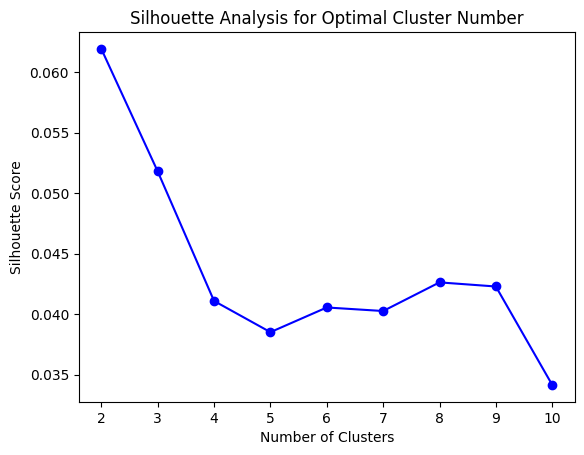

In [ ]:
# 主题聚类分析
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 降维可视化
# pca = PCA(n_components=2)
# vectors_2d = pca.fit_transform(embeddings)

# 寻找最佳聚类数
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []

embeddings = embeddings_all
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数曲线
plt.plot(range_n_clusters, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Cluster Number")
plt.show()


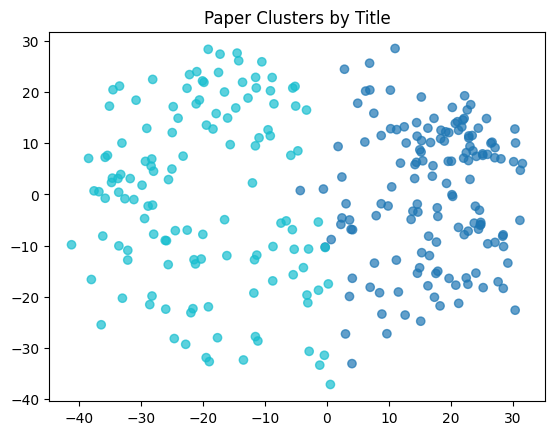

In [16]:
import numpy as np
# 使用最佳聚类数进行最终聚类
# optimal_n_clusters = np.argmax(silhouette_scores) + 3
optimal_n_clusters = 8
optimal_n_clusters = 3
optimal_n_clusters = 2
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster = kmeans.fit_predict(embeddings)

# 降维可视化
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(embeddings)

# 可视化聚类结果
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=cluster, cmap='tab10', alpha=0.7)
plt.title("Paper Clusters by Title")
plt.show()

In [ ]:
# 查看每个簇的关键词
from collections import Counter

def get_cluster_keywords(cluster_num, n_words=10):
    cluster_titles = df[cluster == cluster_num]

# 多样性分析

Diversity: 0.2259


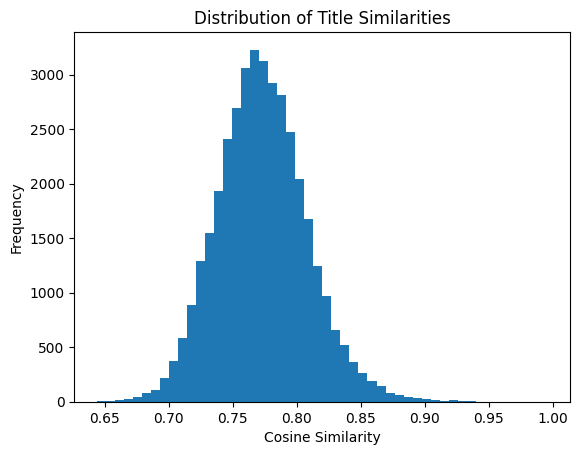

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# 计算标题相似度矩阵
title_embeddings = embeddings_all
similarity_matrix = cosine_similarity(title_embeddings)
# 
avg_similarity = np.mean(similarity_matrix)
diversity = 1 - avg_similarity
print(f"Diversity: {diversity:.4f}")
# 相似度分布可视化
plt.hist(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)], bins=50)
plt.title("Distribution of Title Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

## 统计所有的chunk块的长度分布

In [8]:
from utils.common_utils import load_articles

def get_chunks_len(chunks_path):
    articles_chunks = load_articles(chunks_path)
    # print(f"articles: {len(articles_chunks)}")
    chunks_len = []
    for a_name, a_chunks in articles_chunks.items():
        print(f"processing {a_name}")
        for chunk in a_chunks:
            chunks_len.append(len(chunk["chunk"]))
    print(f"all chunks len: {len(chunks_len)}.")
    return chunks_len

processing 6.5万彩色显示PM-OLED控制与驱动芯片_秦波_llm_correct.md
processing 640×480_TFT-AMLCD有源层的制备_葛长军_llm_correct.md
processing 640×480像素矩阵OL...ilicon微显示芯片设计_陆超_llm_correct.md
processing 7.6cm多色有源矩阵液晶显示器_冯治兴_llm_correct.md
processing 80C196KC与液晶显示...174的接口设计及编程实现_冯占英_llm_correct.md
processing 8光罩BCE结构IGZO-...的钝化层通孔柱状不良的改善_刘浩_llm_correct.md
processing 9.5英寸对角线的多色非晶硅TFT-LCD板_陈宏琪_llm_correct.md
processing 97平板显示综述_朱昌昌_llm_correct.md
processing 980nm底发射VCSEL的DBR设计与优化_李特_llm_correct.md
processing 9款38cm(15英寸)TFT_LCD显示器横向评测_张韬_llm_correct.md
all chunks len: 266.


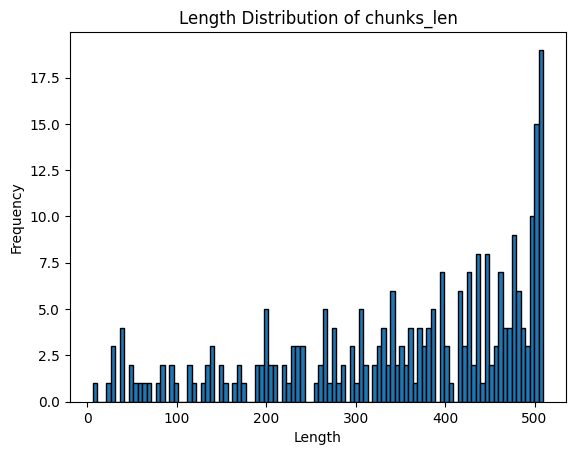

In [9]:
# chunks_len 数据结构为 [124, 512, 324]，现在需要通过直方图的方式展示出来长度分布
import matplotlib.pyplot as plt

# 数据
chunks_len = get_chunks_len("outputs_chunks/article_chunks12.json")

# 绘制直方图
plt.hist(chunks_len, bins=100, edgecolor='black')

# 添加标题和轴标签
plt.title('Length Distribution of chunks_len')
plt.xlabel('Length')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [7]:
chunks_len[0], chunks_len[6], chunks_len[10], chunks_len[16]

(3, 3, 3, 3)

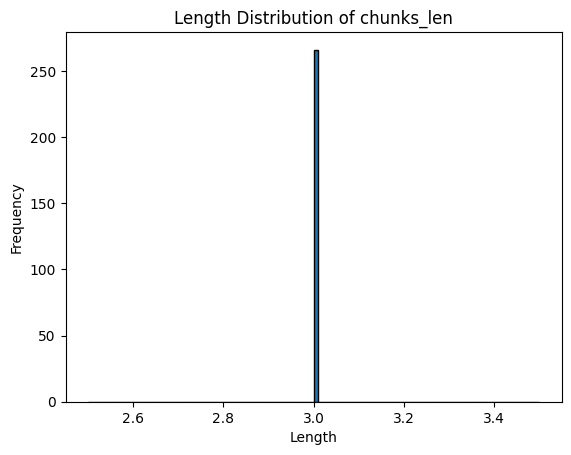

In [4]:
# 绘制直方图
plt.hist(chunks_len, bins=100, edgecolor='black')

# 添加标题和轴标签
plt.title('Length Distribution of chunks_len')
plt.xlabel('Length')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [3]:
chunk = []
chunk = None
chunk = "None"
if chunk:
    print("hello")

hello
